## 회기 트리
- 트리 기반의 회귀 방식
    - 사이킷 런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능
    - 이는 트리가 CART(Classification and Regression Tree)를 기반으로 만들어졌기 때문
    - CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘
    - CART 회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS(SSE)가 최소가 될 수 있는 기준을 찾아서 분할
    - 최종 분할이 완료된 후에 각 분할 영역에 있는 데이터 결정값들의 평균 값으로 학습/예측

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# boston 데이타셋 로드
boston_df = pd.read_csv('../datasets/Boston.csv', index_col=0)

y_target = boston_df['medv']
X_data = boston_df.drop(['medv'],axis=1,inplace=False)

# 릿지 클래스
rf =  RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 folds 의 개별 RMSE scores :  [2.808 3.625 4.536 6.799 4.345]
 5 folds 의 평균 RMSE : 4.423 


In [3]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print(f'##### {model.__class__.__name__} #####')
    print(f'5 교차 검증의 평균 RMSE : {avg_rmse:.3f}')

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg]

for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor #####
5 교차 검증의 평균 RMSE : 5.978
##### RandomForestRegressor #####
5 교차 검증의 평균 RMSE : 4.423
##### GradientBoostingRegressor #####
5 교차 검증의 평균 RMSE : 4.269
##### XGBRegressor #####
5 교차 검증의 평균 RMSE : 4.251


<Axes: >

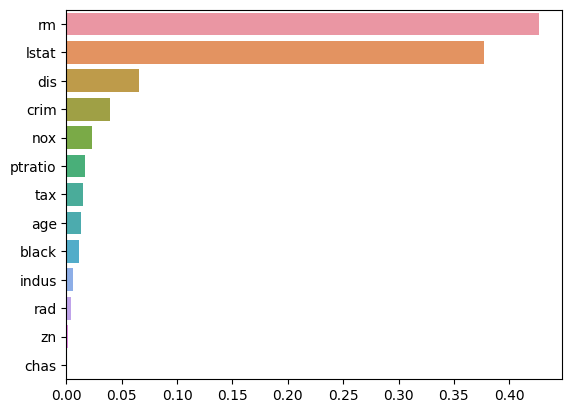

In [5]:
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)

sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


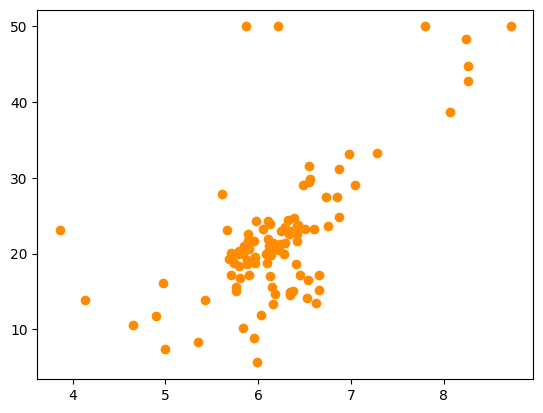

In [7]:
boston_df_sample = boston_df[['rm', 'medv']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)
plt.figure()
plt.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')

In [8]:
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 - 8.5까지 100개 데이터 셋 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 rm만, 그리고 결정 데이터인 medv 추출
X_feature = np.array(boston_df_sample.rm).reshape(-1,1)
y_target = np.array(boston_df_sample.medv).reshape(-1,1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

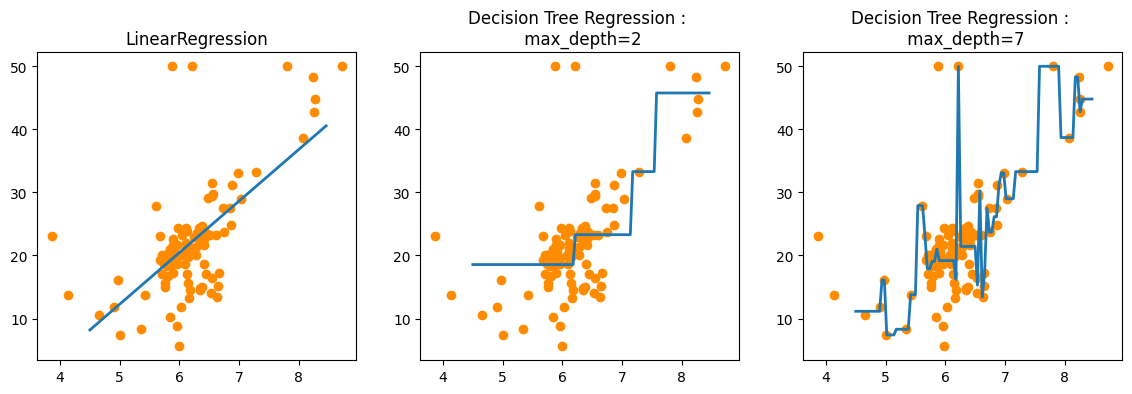

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# x축값을 4.5 - 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시가가화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('LinearRegression')
ax1.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')
ax1.plot(X_test, pred_lr, label='linear', linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression : \n max_depth=2')
ax2.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')
ax2.plot(X_test, pred_rf2, label='max_depth:3', linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression : \n max_depth=7')
ax3.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')
ax3.plot(X_test, pred_rf7, label='max_depth:7', linewidth=2)